## Classical Planning project

In this project, a classical search agent is implemented to planning task. In this project, the planning problems are variations on an Air Cargo logistic problem-- if you have certain number of cargo and a set amount of planes, how do you get them from place to place?

11 different search algorithms are compared: 3 uninformed search methods (breadth first, depth first, and uniform cost searc), and 8 with heuristics (A star and greedy best first graph search with the heuristics of unmet goals, maxlevel, levelsum and setlevel), are tested against 4 different planning problems. The planning problems are of increasing complexity, and the searches are done through a planning graph. The code for the experiment can be found at [this github repo](https://github.com/wwymak/udacity-ai-nd-projects/tree/master/2_Classical%20Planning). All experiments are run using pypy rather than normal python to speed up calculation speeds.

### Measuring algorithm performance

As per ref [1], the performance of search algorithms are measured in terms of:

> Completeness: Is the algorithm guaranteed to find a solution when there is one?

> Optimality: Does the strategy find the optimal solution (it has the lowest path cost among all solutions) 

> Time complexity: How long does it take to find a solution?

> Space complexity: How much memory is needed to perform the search?

In the experiment set, we can think of space complexity as the number of nodes expanded, time complexity as the time taken to run the algorithm on a problem, and as we know the path plan for each of the strategies, we also know which algorithms are optimal.

### Experiment results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [10]:
df = pd.read_csv('run_search_output.csv')

#### The complete experiment output:

In [11]:
df

,problem,algo,action,nodes_expanded,goal_test,new_nodes,plan_length,time_to_run,time_run_pypy
0,1,breadth_first_search,20,43,56,178,6,0.006867,0.032478
1,1,depth_first_graph_search,20,21,22,84,20,0.005211,0.007989
2,1,uniform_cost_search,20,60,62,240,6,0.013549,0.019776
3,1,greedy_best_first_graph_search with h_unmet_goals,20,7,9,29,6,0.001590,0.003040
4,1,greedy_best_first_graph_search with h_pg_levelsum,20,6,8,28,6,0.643192,0.668640
5,1,greedy_best_first_graph_search with h_pg_maxlevel,20,6,8,24,6,0.375530,0.187120
6,1,greedy_best_first_graph_search with h_pg_setlevel,20,6,8,28,6,0.627370,0.514928
7,1,astar_search with h_unmet_goals,20,50,52,206,6,0.009225,0.015860
8,1,astar_search with h_pg_levelsum,20,28,30,122,6,1.589226,0.267637
9,1,astar_search with h_pg_maxlevel,20,43,45,180,6,1.448989,0.209042



### Measuring space complexity:  Nodes expanded vs actions (i.e. problem complexity) and algorithm used

The following slice of the results table shows how the number nodes expanded increases as the problem space increases. As expected, the number of nodes increased as the problem space increased. However, the greedy best first search expanded the smallest number of nodes and more importantly, as the number of actions increased, the nodes expanded increases sublinearly, i.e. the search space doesn't 'explode' like most of the other algorithms tested. 

We can also see that the informed searches does better than all 3 of the uniformed search algorithms, especially as the problem becomes more complex. With the exception of the depth first search, all the uniformed search methods expanded a much larger number of nodes than the informed searches. This is becuase the uniformed search methods have no guidance on where the goal state is, and therefore need to explore more space in order to find the goal. 

Among uninformed search methods, depth first search is the most efficient, with the least number of nodes expanded. This is because 
For the search algorithms with heuristics, 

In [14]:
pivot = pd.pivot_table(df, 'nodes_expanded', 'algo', 'action')
pivot

action,20,72,88,104
algo,,,,
astar_search with h_pg_levelsum,28,357,369,1208
astar_search with h_pg_maxlevel,43,2887,9580,62077
astar_search with h_pg_setlevel,33,1037,3423,22606
astar_search with h_unmet_goals,50,2467,7388,34330
breadth_first_search,43,3343,14663,99736
depth_first_graph_search,21,624,408,25174
greedy_best_first_graph_search with h_pg_levelsum,6,9,14,17
greedy_best_first_graph_search with h_pg_maxlevel,6,27,21,56
greedy_best_first_graph_search with h_pg_setlevel,6,9,35,107


Text(0,0.5,'nodes expanded')

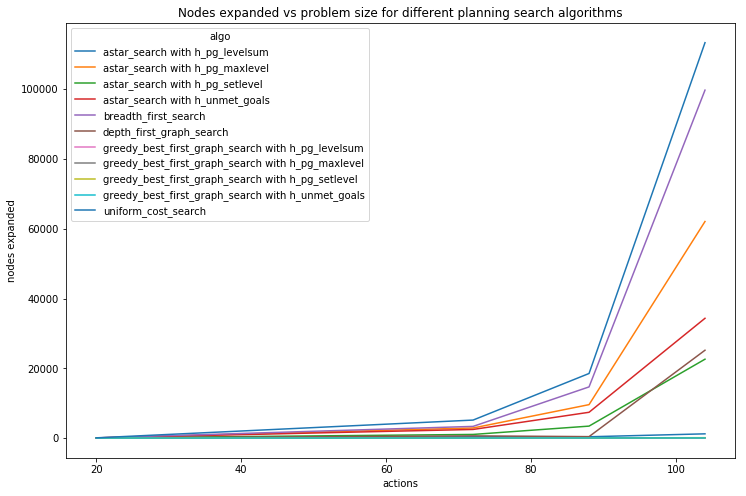

In [25]:
ax = pivot2.plot(title="Nodes expanded vs problem size for different planning search algorithms", figsize=(12,8))
ax.set_xlabel("actions")
ax.set_ylabel("nodes expanded")

In [16]:
pivot2 = pd.pivot_table(df, 'nodes_expanded', 'action', 'algo')

actions = pivot2.index.get_level_values(0).unique()
actions
for act in actions:
    split=pivot2.xs(act)

#     rain=split["rain(mm)"]
#     temp=split["temp(dC)"]

#     plt.subplots()
#     temp.plot(kind="line",color="r",).legend()
#     rain.plot(kind="bar").legend()

Int64Index([20, 72, 88, 104], dtype='int64', name='action')

In [17]:
pivot2.xs(20)

algo
astar_search with h_pg_levelsum                      28
astar_search with h_pg_maxlevel                      43
astar_search with h_pg_setlevel                      33
astar_search with h_unmet_goals                      50
breadth_first_search                                 43
depth_first_graph_search                             21
greedy_best_first_graph_search with h_pg_levelsum     6
greedy_best_first_graph_search with h_pg_maxlevel     6
greedy_best_first_graph_search with h_pg_setlevel     6
greedy_best_first_graph_search with h_unmet_goals     7
uniform_cost_search                                  60
Name: 20, dtype: int64

In [7]:
algo_index = df.set_index(['algo', 'action']).sort_index()
algo_index

problem  \
algo                                              action            
astar_search with h_pg_levelsum                   20.0          1   
                                                  72.0          2   
                                                  88.0          3   
                                                  104.0         4   
astar_search with h_pg_maxlevel                   20.0          1   
                                                  72.0          2   
                                                  88.0          3   
                                                  NaN           4   
astar_search with h_pg_setlevel                   20.0          1   
                                                  72.0          2   
                                                  88.0          3   
                                                  NaN           4   
astar_search with h_unmet_goals                   20.0          1   
                                                  72.0          2   
                                                  88.0          3   
                                                  104.0         4   
breadth_first_search                              20.0          1   
                                                  72.0          2   
                                                  88.0          3   
                                                  104.0         4   
depth_first_graph_search                          20.0          1   
                                                  72.0          2   
                                                  88.0          3   
                                                  104.0         4   
greedy_best_first_graph_search with h_pg_levelsum 20.0          1   
                                                  72.0          2   
                                                  88.0          3   
                                                  104.0         4   
greedy_best_first_graph_search with h_pg_maxlevel 20.0          1   
                                                  72.0          2   
                                                  88.0          3   
                                                  104.0         4   
greedy_best_first_graph_search with h_pg_setlevel 20.0          1   
                                                  72.0          2   
                                                  88.0          3   
                                                  104.0         4   
greedy_best_first_graph_search with h_unmet_goals 20.0          1   
                                                  72.0          2   
                                                  88.0          3   
                                                  104.0         4   
uniform_cost_search                               20.0          1   
                                                  72.0          2   
                                                  88.0          3   
                                                  104.0         4   

                                                          nodes_expanded  \
algo                                              action                   
astar_search with h_pg_levelsum                   20.0              28.0   
                                                  72.0             357.0   
                                                  88.0             369.0   
                                                  104.0           1208.0   
astar_search with h_pg_maxlevel                   20.0              43.0   
                                                  72.0            2887.0   
                                                  88.0            9580.0   
                                                  NaN                NaN   
astar_search with h_pg_setlevel                   20.0              33.0   
                                               